In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feature_fnc
import whois
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
#url_df= pd.read_csv('Data/Web page phishing detection/Web page phishing detection/dataset_B_05_2020.csv')

In [4]:
## Create Dataset ##

In [5]:
## Create Dataset ##
url_df= pd.read_csv('Data/Web page phishing detection/Web page phishing detection/dataset_B_05_2020.csv')
url_df.drop(columns=url_df.columns[1:-1], inplace=True)
feature_fnc.parseurl(url_df)
cleaned_df=feature_fnc.feature_generator(url_df)
cleaned_df.set_index('url',inplace=True)

In [6]:
#url_df

In [7]:
#url_df.tail()

In [8]:
#cleaned_df.head()

In [9]:
#filt=(cleaned_df['file_hyphen_count']>0)

In [10]:
#url_df['filename'].str.len()

In [11]:
#cleaned_df.loc[filt]

In [12]:
#cleaned_df.head()

In [13]:
#cleaned_df.rename(columns = {'status':'phishing'}, inplace = True)

In [14]:
#filt = (cleaned_df['hostname_slash_count'] > 0)

In [15]:
#cleaned_df.loc[filt,'hostname_slash_count']

In [16]:
cleaned_df.describe()

,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,url_exclamation_count,...,file_and_count,file_exclamation_count,file_space_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.0,11430.000000
mean,61.120035,2.480665,0.322660,0.997550,4.289589,0.141207,0.293176,0.022222,0.162292,0.002450,...,0.002975,0.001312,0.0,0.003062,0.000262,0.004024,0.000087,0.0,0.0,0.030359
std,55.292470,1.369685,1.093336,2.087087,1.882251,0.364456,0.998317,0.155500,0.821337,0.059109,...,0.061976,0.036204,0.0,0.095801,0.016199,0.075885,0.009354,0.0,0.0,0.743418
min,12.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,33.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,47.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,71.000000,3.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,1641.000000,24.000000,18.000000,43.000000,33.000000,3.000000,19.000000,4.000000,19.000000,3.000000,...,2.000000,1.000000,0.0,4.000000,1.000000,3.000000,1.000000,0.0,0.0,54.000000


In [51]:
#cleaned_df.replace({'legitimate': 0, 'phishing': 1}, inplace=True)

In [52]:
#cleaned_df.set_index('url',inplace=True)

In [53]:
#cleaned_df

In [11]:
#cleaned_df=cleaned_df.loc[:, ~(cleaned_df == 0).all()]

In [55]:
#filt=(cleaned_df['url_dot_count'] >0)

In [56]:
#test.loc[filt]

In [17]:
cleaned_df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [18]:
cleaned_df=cleaned_df.replace({'legitimate': 0, 'phishing': 1})

In [19]:
cleaned_df.rename(columns = {'status':'phishing'}, inplace = True)

In [20]:
cleaned_df

,phishing,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,...,file_and_count,file_exclamation_count,file_space_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,37,3,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,1,77,1,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,126,4,2,1,5,1,3,0,2,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,18,2,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,55,2,0,2,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,45,2,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,1,84,5,0,0,5,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,0,105,2,1,6,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
cleaned_df['hostname_equal_count']

url
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                            0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                    0
https://support-appleld.com.se

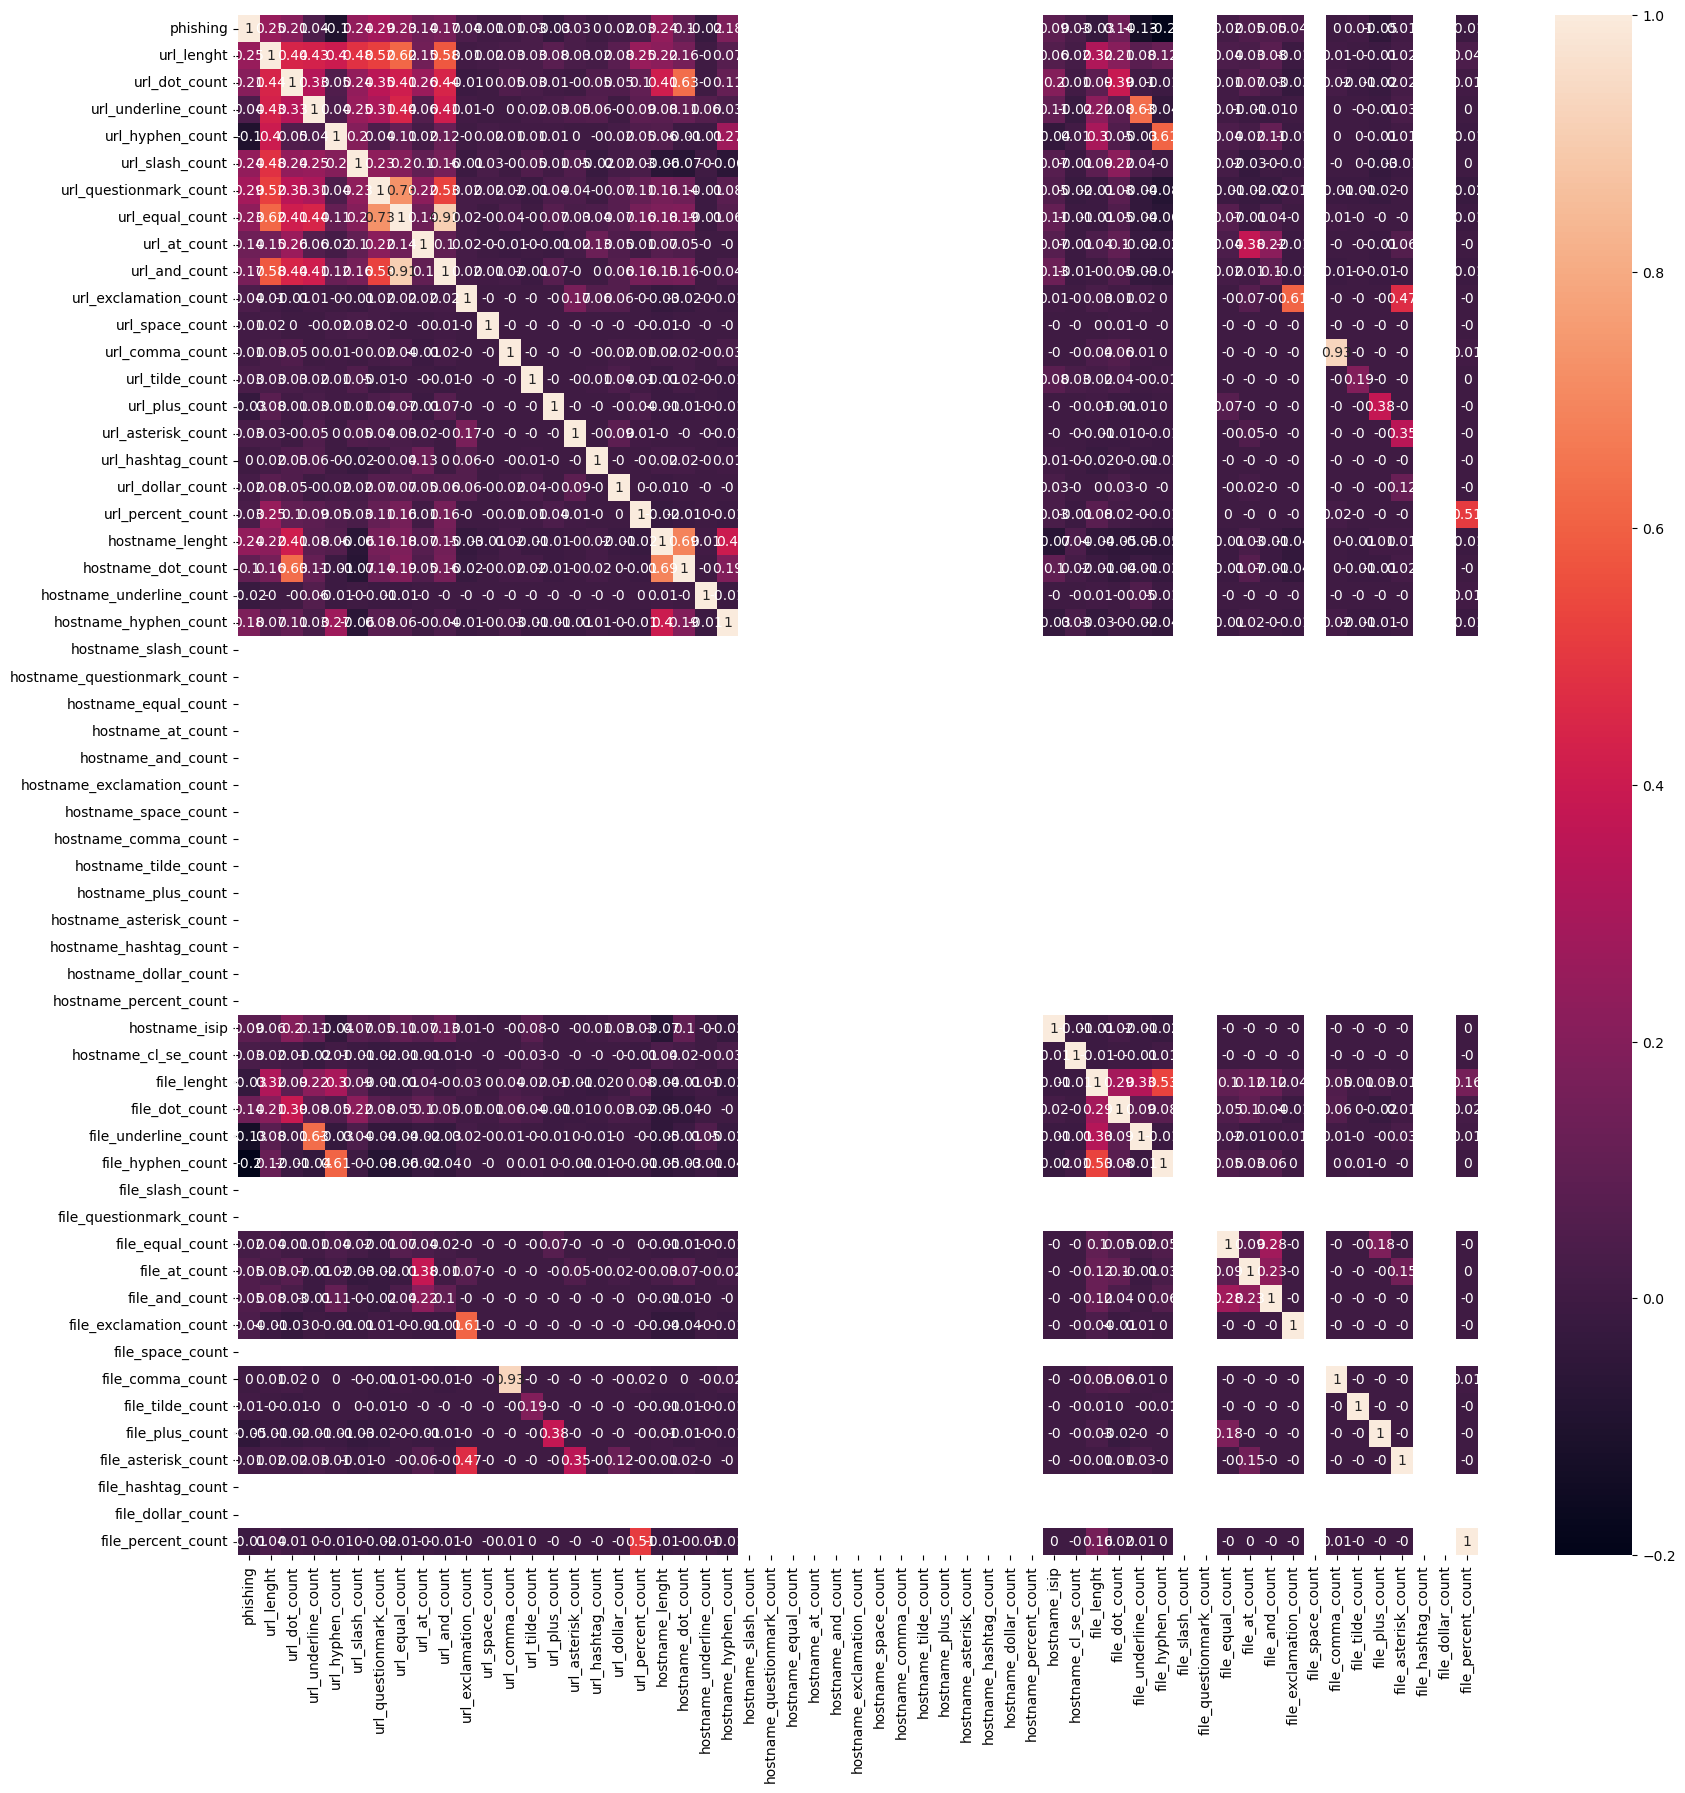

In [18]:
#corr_matrix=test.corr().round(2)
#corr_matrix

plt.figure(figsize=(20,20))
plot = sns.heatmap(cleaned_df.corr().round(2), annot = True)

In [21]:
#cleaned_df.set_index('url',inplace=True)
features=cleaned_df.loc[:,'url_lenght':]
label=cleaned_df.loc[:,'phishing']

In [22]:
features

,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,url_exclamation_count,...,file_and_count,file_exclamation_count,file_space_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,37,3,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,77,1,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,126,4,2,1,5,1,3,0,2,0,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,18,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,55,2,0,2,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,45,2,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,84,5,0,0,5,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,105,2,1,6,5,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
label

url
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                            0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                    1
https://support-appleld.com.se

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

In [25]:
clf = svm.SVC(kernel='linear',verbose=True)

In [26]:
clf.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', verbose=True)

In [27]:
y_pred = clf.predict(X_test)

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7652376786235054


In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred,normalize=False))

Accuracy: 2624


In [31]:
y_test

url
https://www.rga.com/about/workplace                                                                                                                                                                                                      0
http://starasia.com.hk                                                                                                                                                                                                                   0
https://www.youtube.com/watch?v=XszqITK-UEw                                                                                                                                                                                              0
http://www.civico1845.com/                                                                                                                                                                                                               0
http://rapidpaws.com/wp-content/we_transfer/index2.php?e

In [71]:
type(y_test)

pandas.core.series.Series

In [72]:
type(y_pred)

numpy.ndarray

In [52]:
cleaned_df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [50]:
list(cleaned_df.columns)

['url',
 'status',
 'url_lenght',
 'url_dot_count',
 'url_underline_count',
 'url_hyphen_count',
 'url_slash_count',
 'url_questionmark_count',
 'url_equal_count',
 'url_at_count',
 'url_and_count',
 'url_exclamation_count',
 'url_space_count',
 'url_comma_count',
 'url_tilde_count',
 'url_plus_count',
 'url_asterisk_count',
 'url_hashtag_count',
 'url_dollar_count',
 'url_percent_count',
 'hostname_lenght',
 'hostname_dot_count',
 'hostname_underline_count',
 'hostname_hyphen_count',
 'hostname_slash_count',
 'hostname_questionmark_count',
 'hostname_equal_count',
 'hostname_at_count',
 'hostname_and_count',
 'hostname_exclamation_count',
 'hostname_space_count',
 'hostname_comma_count',
 'hostname_tilde_count',
 'hostname_plus_count',
 'hostname_asterisk_count',
 'hostname_hashtag_count',
 'hostname_dollar_count',
 'hostname_percent_count',
 'hostname_isip',
 'hostname_cl_se_count',
 'file_lenght',
 'file_dot_count',
 'file_underline_count',
 'file_hyphen_count',
 'file_slash_count',

In [53]:
cleaned_df.shape

(11430, 58)